<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSFUN/RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresión Lineal (MRL)

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos

In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pyreadstat
Data = pd.read_spss("BASE SATISFACCIÓN.sav")

In [ ]:
Data.head()

,enc,p5_1,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p7_1,p7_2,p7_3,p7_4,p7_5,p7_6,p7_7,p8
0,1.0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,7.0,7.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,8.0
1,2.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,4.0,10.0,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [ ]:
Data.isnull()

,enc,p5_1,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p7_1,p7_2,p7_3,p7_4,p7_5,p7_6,p7_7,p8
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Identificamos el número de missing values en cada columna
Data.isnull().sum()

enc      0
p5_1     0
p5_2     0
p5_3     0
p5_4     0
p5_5     0
p5_6     0
p5_7     0
p5_8     0
p5_9     0
p5_10    0
p5_11    0
p7_1     0
p7_2     0
p7_3     0
p7_4     0
p7_5     0
p7_6     0
p7_7     0
p8       0
dtype: int64

<Axes: >

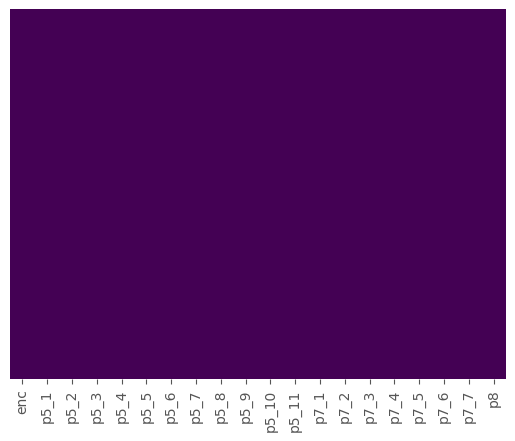

In [ ]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
X = pd.DataFrame(Data,columns = ("p5_1","p5_2","p5_3","p5_4","p5_5","p5_6","p5_7","p5_8","p5_9","p5_10","p5_11",
"p7_1","p7_2","p7_3","p7_4","p7_5","p7_6","p7_7"))
X

,p5_1,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p7_1,p7_2,p7_3,p7_4,p7_5,p7_6,p7_7
0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,7.0,7.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,8.0,7.0,7.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0
4227,9.0,9.0,9.0,10.0,9.0,8.0,9.0,8.0,8.0,8.0,9.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0
4228,8.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0
4229,8.0,8.0,8.0,7.0,7.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


# Correlación de variables

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
189,p5_11,p5_10,0.882825,0.882825
172,p5_10,p5_11,0.882825,0.882825
39,p5_3,p5_4,0.825434,0.825434
56,p5_4,p5_3,0.825434,0.825434
96,p5_6,p5_7,0.821635,0.821635
113,p5_7,p5_6,0.821635,0.821635
153,p5_9,p5_10,0.820075,0.820075
170,p5_10,p5_9,0.820075,0.820075
303,p7_6,p7_5,0.816483,0.816483
286,p7_5,p7_6,0.816483,0.816483


In [ ]:
corr = np.corrcoef(X.T)
corr

array([[1.        , 0.7806614 , 0.76515435, 0.71032027, 0.36251595,
        0.70588137, 0.72291685, 0.58661499, 0.67504058, 0.70839169,
        0.71082225, 0.42273307, 0.45129982, 0.43825414, 0.48857077,
        0.4133818 , 0.40303809, 0.4579113 ],
       [0.7806614 , 1.        , 0.80924933, 0.76632643, 0.35344314,
        0.72523808, 0.74549103, 0.66501639, 0.73923947, 0.73415329,
        0.7385689 , 0.41456602, 0.45368474, 0.44828661, 0.50704968,
        0.42092925, 0.42540311, 0.47042438],
       [0.76515435, 0.80924933, 1.        , 0.82543439, 0.37462552,
        0.7545825 , 0.78063397, 0.60458948, 0.7073811 , 0.75113879,
        0.75577268, 0.43332127, 0.46639295, 0.46729457, 0.52184312,
        0.43711597, 0.42053006, 0.50307701],
       [0.71032027, 0.76632643, 0.82543439, 1.        , 0.33926902,
        0.76025001, 0.76146752, 0.59706097, 0.69147277, 0.73562805,
        0.72957344, 0.41785388, 0.45665231, 0.47388982, 0.53979628,
        0.43065447, 0.42336117, 0.51511823],
    

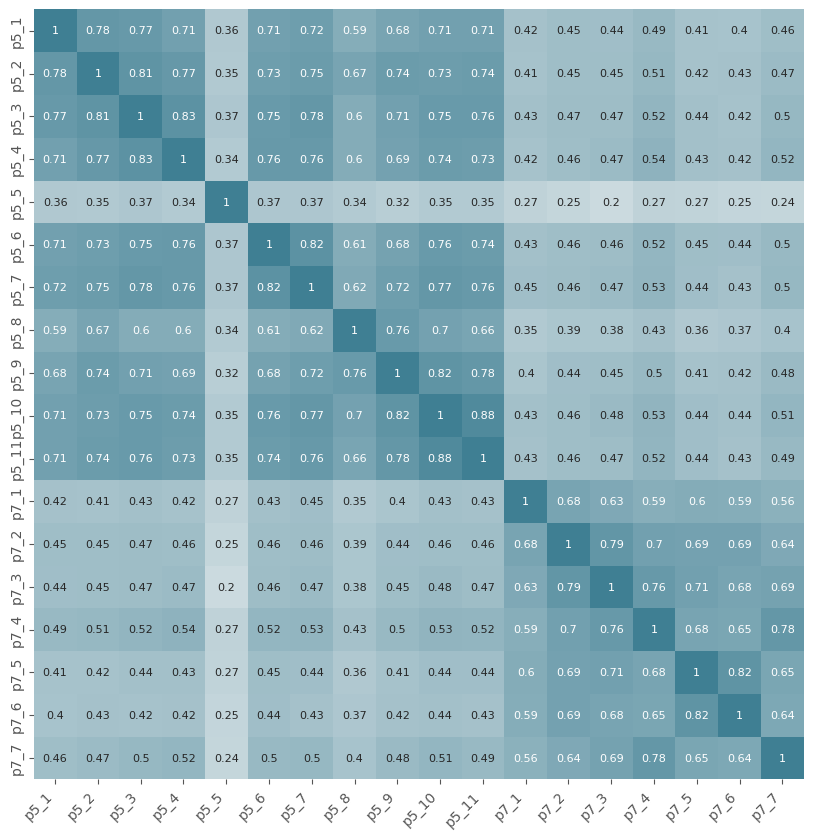

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Resolviendo la multicolinealidad con AF

In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 38.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=7225d5e93ee390cfcba47eb4f56a4b093b172ae30fec65b8a3bcb8869920a0ae
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


# Prueba de Multicolinealidad

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(73416.66539714971, 0.0)

# Prueba de adecuocidad de la muestra (KMO)

In [ ]:
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.9575553505548264

In [ ]:
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation="varimax")
fa.fit(X)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([10.48279421,  2.36231119,  0.83715125,  0.59214688,  0.51048743,
        0.46950547,  0.39453858,  0.34149921,  0.32409901,  0.27744419,
        0.22326111,  0.20206268,  0.19198066,  0.18569397,  0.17789833,
        0.1649328 ,  0.15174837,  0.11044465])

In [ ]:
fa.get_communalities()

array([0.68313911, 0.76156697, 0.77893194, 0.73329506, 0.17293987,
       0.73083275, 0.76653949, 0.55551915, 0.72596026, 0.80259039,
       0.77849353, 0.52623964, 0.72768268, 0.75546102, 0.71590205,
       0.72134709, 0.68681518, 0.63741461])

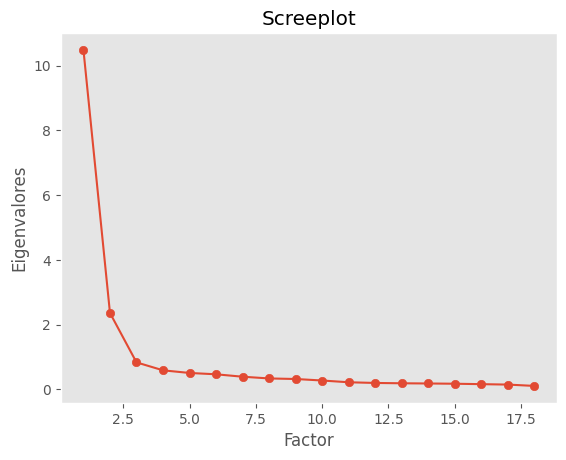

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Screeplot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalores')
plt.grid()
plt.show()

In [ ]:
factores=pd.DataFrame(fa.loadings_,columns=['F1','F2'],index=X.columns)
print(factores)

             F1        F2
p5_1   0.780132  0.273007
p5_2   0.831209  0.265818
p5_3   0.835344  0.284838
p5_4   0.802876  0.297800
p5_5   0.374464  0.180877
p5_6   0.801148  0.298320
p5_7   0.823888  0.296223
p5_8   0.709938  0.226951
p5_9   0.810526  0.262692
p5_10  0.848959  0.286111
p5_11  0.836540  0.280525
p7_1   0.290400  0.664761
p7_2   0.278276  0.806378
p7_3   0.277691  0.823619
p7_4   0.369134  0.761342
p7_5   0.246908  0.812640
p7_6   0.247105  0.791046
p7_7   0.352823  0.716192


# Calculo de las puntuaciones factorial

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca

PCA()

In [ ]:
proy = pca_pipe.transform(X)
proyecciones = pd.DataFrame(proy)
proyecciones

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.046109,-0.950379,-4.128719,1.573268,-0.299259,-0.851106,0.029020,0.700060,-0.445173,0.211246,-0.059690,-1.085661,0.184445,0.843167,-0.417005,-0.250942,0.675541,0.239390
1,-5.362810,-0.799529,-0.650058,-0.138469,0.571732,-0.157072,-0.206676,-0.005339,-0.205191,-0.241964,0.026077,0.000673,0.016331,-0.010149,-0.035432,0.001507,0.030131,-0.012598
2,-5.556817,-0.700850,-0.970853,-0.073906,-0.232087,-0.078120,0.072405,0.060468,0.000461,0.008615,0.015692,0.006012,0.005604,0.039460,-0.013248,0.052999,0.030894,-0.006959
3,-3.566883,3.736729,0.589692,-0.174510,1.267159,-0.332087,-0.303212,0.052253,-0.464242,-0.391674,0.106530,0.049794,0.025989,-0.133692,-0.086127,-0.083657,-0.060541,-0.018843
4,-4.807775,-0.868924,-1.458418,-0.046801,-0.361116,-0.961490,-0.428108,0.504395,0.262021,0.116657,-0.199618,-0.485348,-0.660212,-0.134453,0.217056,-0.039213,0.041769,0.149763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,2.488590,-1.375397,-0.457133,-0.164067,-0.063297,0.761614,-0.143281,-0.349918,-0.313637,-0.207523,0.889415,-0.124706,0.046978,0.898739,1.122194,0.278877,-0.111244,0.747642
4227,-1.012433,-1.087765,-1.639252,1.331587,-1.125694,-0.540015,-0.069029,0.256270,0.712869,-0.591634,0.419766,-0.155742,0.044992,-0.253696,0.825050,-0.691094,-0.022263,0.543020
4228,1.629073,-0.926128,-1.216093,-0.266414,-0.718400,-0.396024,-0.211886,-0.241992,0.947359,-0.388653,-0.070692,-1.283364,-0.066659,-0.134581,0.537479,-0.168792,0.786858,0.138960
4229,3.610553,-0.822770,-0.080407,0.546494,-0.248416,-0.188579,0.671356,-0.621998,-0.247586,-0.109161,-0.647877,0.147025,-0.166580,-0.266853,-0.498929,0.185108,-0.096114,-0.040885


In [ ]:
Puntuaciones = pd.DataFrame(proyecciones,columns=(0,1))
Puntuaciones.columns = ["Factor_1","Factor_2"]
Puntuaciones

,Factor_1,Factor_2
0,0.046109,-0.950379
1,-5.362810,-0.799529
2,-5.556817,-0.700850
3,-3.566883,3.736729
4,-4.807775,-0.868924
...,...,...
4226,2.488590,-1.375397
4227,-1.012433,-1.087765
4228,1.629073,-0.926128
4229,3.610553,-0.822770


In [ ]:
Y = pd.DataFrame(Data,columns = ["p8"])
DataReg = pd.concat([Puntuaciones,Y],axis = 1)
DataReg

,Factor_1,Factor_2,p8
0,0.046109,-0.950379,8.0
1,-5.362810,-0.799529,10.0
2,-5.556817,-0.700850,10.0
3,-3.566883,3.736729,10.0
4,-4.807775,-0.868924,10.0
...,...,...,...
4226,2.488590,-1.375397,8.0
4227,-1.012433,-1.087765,9.0
4228,1.629073,-0.926128,8.0
4229,3.610553,-0.822770,8.0


# Tratamiento de variables continuas

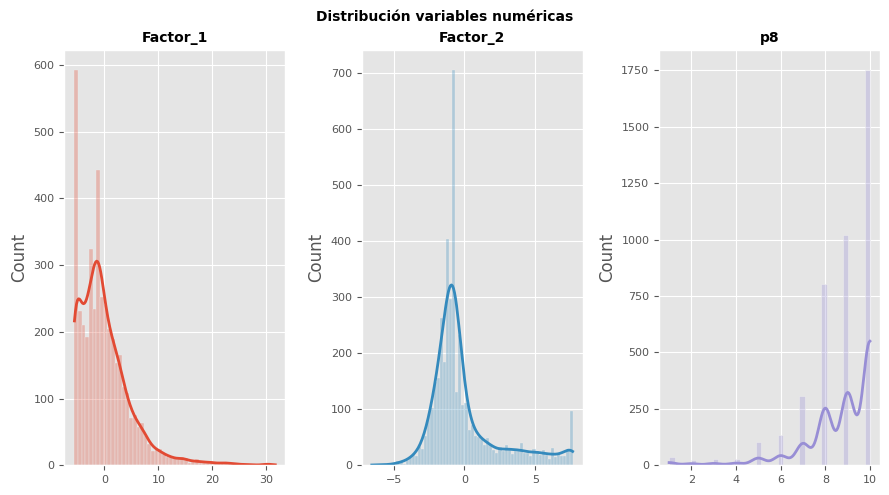

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = DataReg.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = DataReg,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Partición de la data en Train y Test

In [ ]:
# División de los datos en train y test
# ==============================================================================
X2 = DataReg[['Factor_1', 'Factor_2']]
Y2 = DataReg['p8']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(
                                        X2,
                                        Y2.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Modelado

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X2_train = sm.add_constant(X2_train, prepend=True)
modelo = sm.OLS(endog=Y2_train, exog=X2_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:57:10   Log-Likelihood:                -5042.0
No. Observations:                3384   AIC:                         1.009e+04
Df Residuals:                    3381   BIC:                         1.011e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7217      0.018    472.323      0.0

# Diagnósticos de residuos

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
Y2_train = Y2_train.flatten()
prediccion_train = modelo.predict(exog = X2_train)
residuos_train   = prediccion_train - Y2_train
residuos_train

2959   -0.535163
909    -1.127615
730     0.025126
3015    0.248373
1308   -0.021916
          ...   
664    -0.340378
3276   -0.262302
1318    0.038447
723     0.740302
2863   -1.242920
Length: 3384, dtype: float64

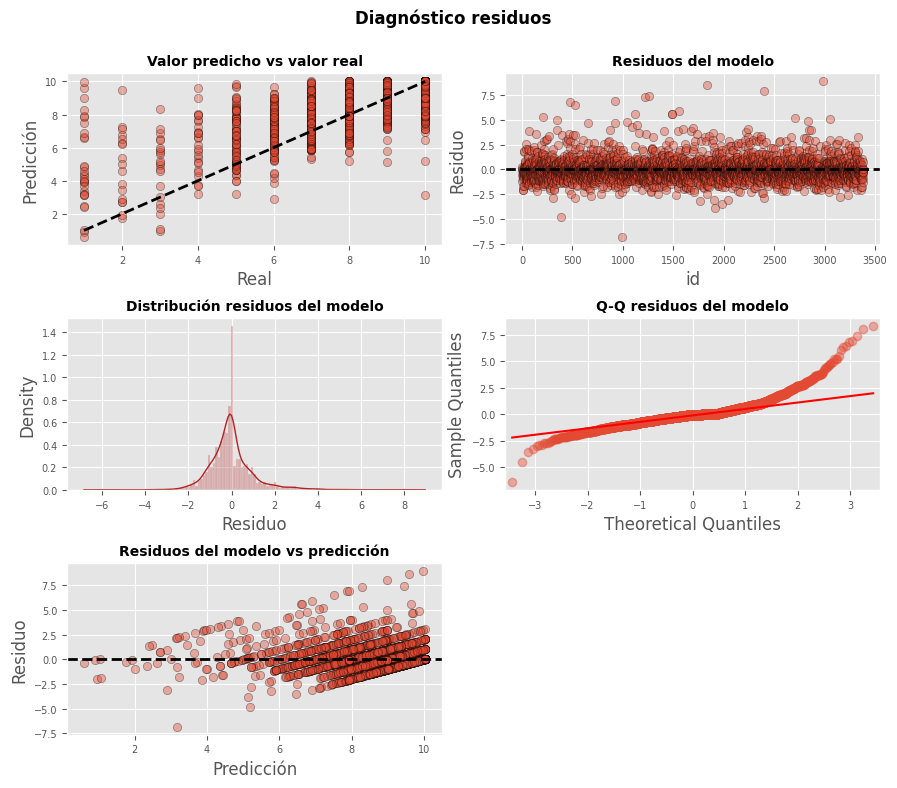

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y2_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y2_train.min(), Y2_train.max()], [Y2_train.min(), Y2_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y2_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8696119785308838, pvalue=0.0)

In [ ]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo.get_prediction(exog = X2_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2959,9.464837,0.022176,9.421357,9.508316,7.358463,11.571210
909,8.872385,0.050553,8.773268,8.971503,6.764130,10.980641
730,10.025126,0.026842,9.972498,10.077753,7.918544,12.131708
3015,8.248373,0.025534,8.198310,8.298436,6.141854,10.354893


In [ ]:
# Error de test del modelo
# ==============================================================================
X2_test = sm.add_constant(X2_test, prepend=True)
predicciones = modelo.predict(exog = X2_test)
rmse = mean_squared_error(
        y_true  = Y2_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.1252118389799697
